# Árbol de decisión para especies de flores
Utilizamos el dataset de la flor Iris para este ejercicio que ya habias visto en el curso de IA de la UNAD
https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("../datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
data.shape #150 muestras

(150, 5)

Vamos a revisar como se distribuyen los datos, esto logrado gracias al histograma

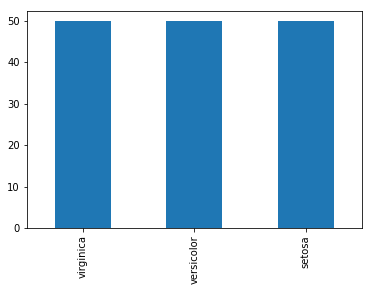

In [33]:
pd.Series(data.Species).value_counts().plot(kind='bar')

In [15]:
data.Species.unique()#tres datos: setosa, versicolor, virginica

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [22]:
colnames = data.columns.values.tolist()#nombres de columna
predictoras = colnames[:4]#4 valores predictores
objetivo = colnames[4]#varaible que buscamos predecir. Es setosa, versicolor o virginica esos valores?
#guardan lista de nombres de columna

In [23]:
import numpy as np

In [35]:
#75% de los datos son para entrenamiento:
data["is_train"] = np.random.uniform(0,1, len(data))<0.75 #distribucion uniforme
data["is_train"]

0       True
1       True
2       True
3       True
4       True
       ...  
145     True
146    False
147     True
148     True
149     True
Name: is_train, Length: 150, dtype: bool

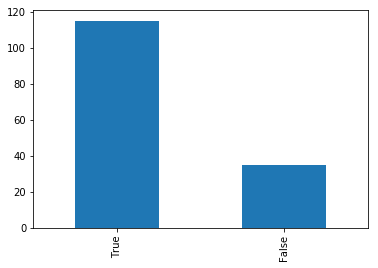

In [41]:
pd.Series(data.is_train).value_counts().plot(kind='bar')

40 flores son para "False" o validar y 110 son para entrenar

In [42]:
train, test = data[data["is_train"]==True], data[data["is_train"]==False]#datos marcados como true sera para entrenar
#falso seran para test

In [44]:
data.head() #columna is_train marca si es para entrenar o no

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


Ahora vamos a usar nuestro clasificador

In [47]:
from sklearn.tree import DecisionTreeClassifier #importo libreria de arbol clasificador

In [49]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
#clasifico con el metodo de entropia, algoritmo ID3
#minimo de elementos para hacer un split o division --> min_samples_split
    #esto es para decirle a los cuantos elementos un nodo se debe crear un subnodo
#random state --> ???
tree.fit(train[predictoras], train[objetivo])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

Otro parametro que no definimos es:
   *  _min_sample_leaf=_ que define el minimo total de ejemplos para crear una hoja

Utilizaremos el arbol para predecir lso valores del 25% restante

In [52]:
preds = tree.predict(test[predictoras])#variables para testear el arbol

In [54]:
pd.crosstab(test[objetivo], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,11,0,0
versicolor,0,13,1
virginica,0,0,10


* Al lado izquierdo tengo los valores actuales de la flor (el dataset original)
* Arriba se enlistan los que se predijeron con las varaibles _"predictions"_

**Resultados**

    * Todas las setosas fueorn bien clasificadas
    * Una que era versicolor se me clasifico mal como "virginica"
    * las 10 virginicas OK